         Date      Gastos
0  2020-01-01  524.835708
1  2020-02-01  494.904967
2  2020-03-01  536.020791
3  2020-04-01  581.606038
4  2020-05-01  495.565059
5  2020-06-01  497.384061
6  2020-07-01  589.869732
7  2020-08-01  551.099009
8  2020-09-01  491.071735
9  2020-10-01  543.491639
10 2020-11-01  495.010934
11 2020-12-01  496.713512
12 2021-01-01  533.916295
13 2021-02-01  427.972351
14 2021-03-01  439.208654
15 2021-04-01  499.158351
16 2021-05-01  478.449353
17 2021-06-01  546.621458
18 2021-07-01  487.326069
19 2021-08-01  463.930269
20 2021-09-01  609.646075
21 2021-10-01  526.893003
22 2021-11-01  543.376410
23 2021-12-01  470.580773
24 2022-01-01  516.417227
25 2022-02-01  551.000675
26 2022-03-01  489.723048
27 2022-04-01  567.875810
28 2022-05-01  520.877156
29 2022-06-01  538.142585
30 2022-07-01  524.460124
31 2022-08-01  648.977546
32 2022-09-01  557.506957
33 2022-10-01  507.114454
34 2022-11-01  602.945427
35 2022-12-01  502.594181
36 2023-01-01  575.897725
37 2023-02-0

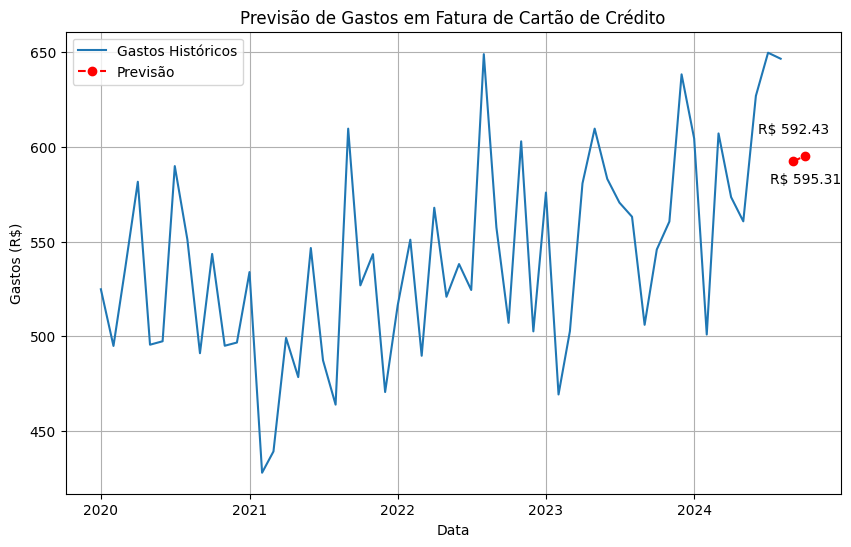

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Simulação de dados de gastos mensais em fatura de cartão de crédito
dates = pd.date_range(start="2020-01-01", end="2024-08-01", freq='MS')
np.random.seed(42)
gastos = np.random.normal(loc=500, scale=50, size=len(dates)) + np.linspace(0, 100, len(dates))

# Criar DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Gastos': gastos
})

# Extrair o número do mês e do ano como features
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Preparar os dados para a regressão
X = df[['Year', 'Month']]
y = df['Gastos']

# Criar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Previsão para os meses de setembro e outubro de 2024
future_dates = pd.DataFrame({
    'Date': pd.to_datetime(['2024-09-01', '2024-10-01']),
    'Year': [2024, 2024],
    'Month': [9, 10]
})
future_gastos_pred = model.predict(future_dates[['Year', 'Month']])

# Adicionar previsões ao DataFrame
future_dates['Gastos'] = future_gastos_pred

# Concatenar os dados históricos com as previsões
df_full = pd.concat([df, future_dates], ignore_index=True)

# Gerar o relatório
relatorio = df_full[['Date', 'Gastos']]
print(relatorio)

# Plotar os dados e a previsão
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Gastos'], label='Gastos Históricos')
plt.plot(future_dates['Date'], future_gastos_pred, 'ro--', label='Previsão')

# Adicionar rótulos aos pontos de previsão com deslocamento alternado
for i, gasto in enumerate(future_gastos_pred):
    y_offset = 20 if i % 2 == 0 else -20  # Alterna entre rótulos acima e abaixo dos pontos
    plt.annotate(f'R$ {gasto:.2f}',
                 (pd.to_datetime(f'2024-{9+i}-01'), gasto),
                 textcoords="offset points",
                 xytext=(0, y_offset),
                 ha='center')

# Configurações adicionais do gráfico
plt.xlabel('Data')
plt.ylabel('Gastos (R$)')
plt.title('Previsão de Gastos em Fatura de Cartão de Crédito')
plt.legend()
plt.grid(True)
plt.show()
